In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузка и обзор данных

In [2]:
# Download latest version
path = kagglehub.dataset_download("mar1mba/russian-sentiment-dataset")

print("Путь к файлу:", path)

Путь к файлу: C:\Users\1\.cache\kagglehub\datasets\mar1mba\russian-sentiment-dataset\versions\2


In [3]:
# Проверка корректности пути
print(os.listdir(path))

['sentiment_dataset.csv']


In [4]:
# Создание полного пути к файлу и выгрузка в DataFrame
file_path = os.path.join(path, 'sentiment_dataset.csv')
df = pd.read_csv(file_path)

In [5]:
# Просмотр датасета
df.head(10)

,text,label,src
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,rureviews
1,"Очень долго шел заказ,ждала к новому году,приш...",0,rureviews
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,rureviews
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,rureviews
4,Мне не очень понравилось это платье. Размер ...,0,rureviews
5,"внешне качество хорошее, без запаха. силикон с...",0,rureviews
6,сшито не аккуратно. качество материала низкое....,0,rureviews
7,Кофта понравилась и доставлена была очень быст...,0,rureviews
8,Совершенно не понравилось так как совершенно н...,0,rureviews
9,Разочарована. Покупала до этого в этом магазин...,0,rureviews


In [6]:
df.shape

(290458, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290458 entries, 0 to 290457
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    290458 non-null  object
 1   label   290458 non-null  int64 
 2   src     290458 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


Колонка src (источник данных) не нужна, требуеся только целевая и тексты. Удаляем ненужную колонку

In [8]:
df_copy = df.copy()
df_copy = df_copy.drop('src', axis=1)

In [9]:
df_copy.head(10)

,text,label
0,"Пальто красивое, но пришло с дырой в молнии. П...",0
1,"Очень долго шел заказ,ждала к новому году,приш...",0
2,"Могу сказать одно, брюки нормальные, НО они бы...",0
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0
4,Мне не очень понравилось это платье. Размер ...,0
5,"внешне качество хорошее, без запаха. силикон с...",0
6,сшито не аккуратно. качество материала низкое....,0
7,Кофта понравилась и доставлена была очень быст...,0
8,Совершенно не понравилось так как совершенно н...,0
9,Разочарована. Покупала до этого в этом магазин...,0


Поиск и удаление дубликатов

In [10]:
df_copy['text'].duplicated().sum()

68

In [11]:
duplicates = df_copy['text'].duplicated()
df_copy[duplicates]

,text,label
238054,Очень маленький размер,2
238419,Все плохо,2
239173,Не стоит этих денег,2
239252,Низкое качество,2
239868,Маленькие,2
...,...,...
282931,Классная!,1
284942,хорошая,1
287755,спасибо,1
288998,Очень быстро,1


In [12]:
df_clean = df_copy.drop_duplicates(subset=['text']).copy()
df_clean.shape

(290390, 2)

#### Анализ целевой переменной

In [13]:
df_clean['label'].value_counts()

label
2    96963
1    96865
0    96562
Name: count, dtype: int64

Столбчатая диаграмма распределения классов

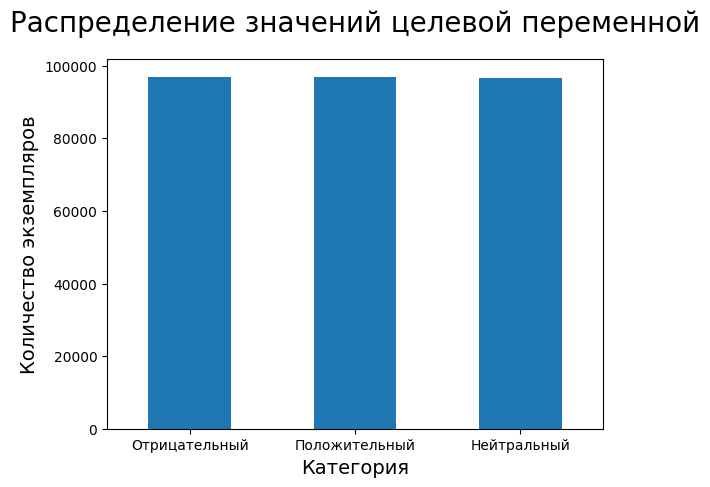

In [14]:
labels_target = {0:'Нейтральный', 1:'Положительный', 2:'Отрицательный'}

df_clean['label'].map(labels_target).value_counts().plot(kind='bar',
                                                rot = 0)
plt.title('Распределение значений целевой переменной', fontsize=20, pad=20)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество экземпляров', fontsize=14)
plt.show()

Статистика и диаграмма демонстрируют равномерное распределение значений по классам

#### Очистка и подготовка данных

In [15]:
import re

In [16]:
df_clean['clear_text'] = df_clean['text'].str.lower()
df_clean.head(10)

,text,label,clear_text
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,"пальто красивое, но пришло с дырой в молнии. п..."
1,"Очень долго шел заказ,ждала к новому году,приш...",0,"очень долго шел заказ,ждала к новому году,приш..."
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,"могу сказать одно, брюки нормальные, но они бы..."
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,"доставка быстрая, меньше месяца. заказывали ра..."
4,Мне не очень понравилось это платье. Размер ...,0,мне не очень понравилось это платье. размер ...
5,"внешне качество хорошее, без запаха. силикон с...",0,"внешне качество хорошее, без запаха. силикон с..."
6,сшито не аккуратно. качество материала низкое....,0,сшито не аккуратно. качество материала низкое....
7,Кофта понравилась и доставлена была очень быст...,0,кофта понравилась и доставлена была очень быст...
8,Совершенно не понравилось так как совершенно н...,0,совершенно не понравилось так как совершенно н...
9,Разочарована. Покупала до этого в этом магазин...,0,разочарована. покупала до этого в этом магазин...


In [17]:
# Паттерн для эмодзи
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    "]+", flags=re.UNICODE)

In [18]:
is_emoji = df_clean['clear_text'].str.contains(emoji_pattern, na=False, regex=True)
text_with_emoji = is_emoji.sum()

text_with_emoji

6228

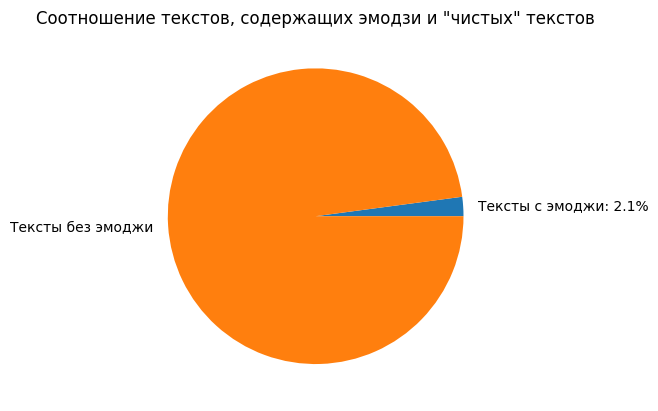

In [19]:
emoji_pie = [text_with_emoji, df_clean.shape[0]]
emoji_percent = text_with_emoji / df_clean.shape[0] * 100
labels = [f'Тексты с эмоджи: {emoji_percent:.1f}%', 'Тексты без эмоджи']
plt.pie(emoji_pie, labels=labels)
plt. title('Соотношение текстов, содержащих эмодзи и "чистых" текстов')
plt.show()

Могут быть значимы для темы определения тональности, не удаляем. Но для облегчения заменяем на тег. 

In [20]:
df_clean['clear_text'] = df_clean['clear_text'].str.replace(emoji_pattern, '[emoji]', regex=True)

Поиск мусора в данных

In [21]:
html_pattern = re.compile(r'<[^>]+>')
has_html = df_clean['text'].str.contains(html_pattern, na=False).sum()
print(f"Текстов с HTML тегами: {has_html} из {len(df_clean)}")

Текстов с HTML тегами: 63 из 290390


In [22]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
has_url = df_clean['text'].str.contains(url_pattern, na=False).sum()
print(f"Текстов с URL: {has_url} из {len(df_clean)}")

Текстов с URL: 573 из 290390


In [23]:
# Паттерн для удаления всех символы кроме букв, цифр и []
special_pattern = re.compile(r'[^a-zа-яё0-9\s\[\]]')

In [24]:
# Очистка от HTML-тегов
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    html_pattern, ' ', regex=True)
# Очистка от URL
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    url_pattern, ' ', regex=True)

In [25]:
# Замена повторяющихся знаков препинания на тег эмоции
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'[!?]{2,}', ' [expression] ', regex=True) # повтор ! и ? -> эмоц.окраска
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'\.{2,}', ' [ellipsis] ', regex=True) # повтор точек -> многоточие
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'[\(\)]{2,}', ' [old_smile] ', regex=True) # повтор скобочек -> смайлик

In [26]:
# Удаление ненужных символов
# Переносы строк:
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'[\n\r\t]', ' ', regex=True)
# Пунктуация:
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    special_pattern, ' ', regex=True)
df_clean

,text,label,clear_text
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,пальто красивое но пришло с дырой в молнии п...
1,"Очень долго шел заказ,ждала к новому году,приш...",0,очень долго шел заказ ждала к новому году приш...
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,могу сказать одно брюки нормальные но они бы...
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,доставка быстрая меньше месяца заказывали ра...
4,Мне не очень понравилось это платье. Размер ...,0,мне не очень понравилось это платье размер ...
...,...,...,...
290453,Как всегда вкусный и свежий.,1,как всегда вкусный и свежий
290454,Обалденный!,1,обалденный
290455,"Достоинства:\nВкусно, лучшая паста\n\nНедостат...",1,достоинства вкусно лучшая паста недостатки ...
290456,"Достоинства:\nУвлажняет очень хорошо, и кожа к...",1,достоинства увлажняет очень хорошо и кожа ка...


In [27]:
# Удаление очевидных опечаток
df_clean['clear_text'] = df_clean['clear_text'].str.replace(r'(.)\1\1+', r'\1\1', regex=True)

In [28]:
# Удаление неочевидных опечаток
from collections import Counter

# Собрать все слова
all_words = ' '.join(df_clean['clear_text']).split()
word_freq = Counter(all_words)

# Слова, встречающиеся 1-2 раза
rare_words = {word for word, count in word_freq.items() if count <= 2}

# Функция для удаления редких слов
def remove_rare(text):
    return ' '.join([w for w in text.split() if w not in rare_words])

# Применение функции
df_clean['clear_text'] = df_clean['clear_text'].apply(remove_rare)

In [29]:
# Примеры удаленных слов
for word in list(rare_words)[:20]:
    print(f'  - {word}')

  - 2014й
  - расцарапана
  - сюжетасобытия
  - банальней
  - авери
  - nтабрис
  - лосят
  - ахиджакова
  - жожоотсылку1280x720
  - нишимию
  - хэнксом
  - государ
  - беззаконное
  - мааленькими
  - 10экшена
  - фишкистоит
  - прибать
  - плиточник
  - покричит
  - бырому


In [30]:
df_clean['clear_text'] = df_clean['clear_text'].str.replace(
    r'\s+',' ', regex=True).str.strip()

In [31]:
# Узнать уникальных слов
all_words = ' '.join(df_clean['clear_text']).split()
unique_words = len(set(all_words))
print(f"Уникальных слов: {unique_words}")

Уникальных слов: 163904


Проверка пропусков после очистки

In [32]:
empty = df_clean['clear_text'].str.len() == 0
empty.sum()

309

In [33]:
df_clean = df_clean[df_clean['clear_text'].str.len() > 0]
df_clean.shape

(290081, 3)

Уменьшение объема датасета для исследования, удаление лишней колонки

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df_1 = df_clean[['clear_text', 'label']]
df_small, _ = train_test_split(df_1, train_size=0.3, stratify=df_1['label'], random_state=42)

In [36]:
df_small

,clear_text,label
65310,очень красивая пижама [expression] но [express...,2
30158,пришло быстро до на дону качество хорошее тёпл...,1
79747,рамер не совпадает со стандартами,2
227668,как видим основная масса зрк и зрс около 80 пр...,2
251252,пельмени отвратительные очень жалею что не про...,2
...,...,...
9696,заказывала чёрный цвет [expression] прислали я...,0
56386,доставка в мо 3 недели на параметры 100 80 110...,1
44069,беру второй раз подруге спасибо все отлично,1
83930,посылка не пришла не отслеживается зашита зако...,2


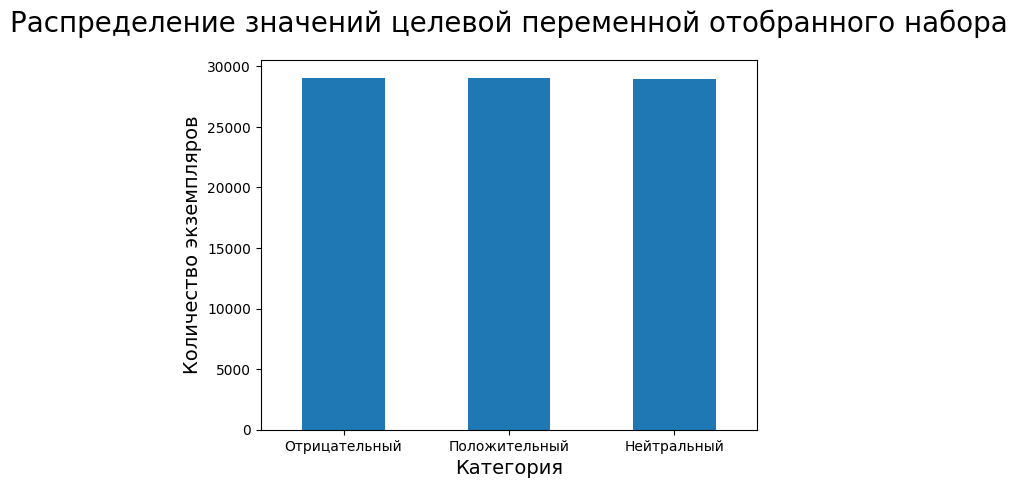

In [37]:
df_small['label'].map(labels_target).value_counts().plot(kind='bar', rot = 0)
plt.title('Распределение значений целевой переменной отобранного набора', fontsize=20, pad=20)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество экземпляров', fontsize=14)
plt.show()

In [38]:
# Статистика длин текстов
# Длины всех текстов
text_lens = df_small['clear_text'].str.split().str.len()

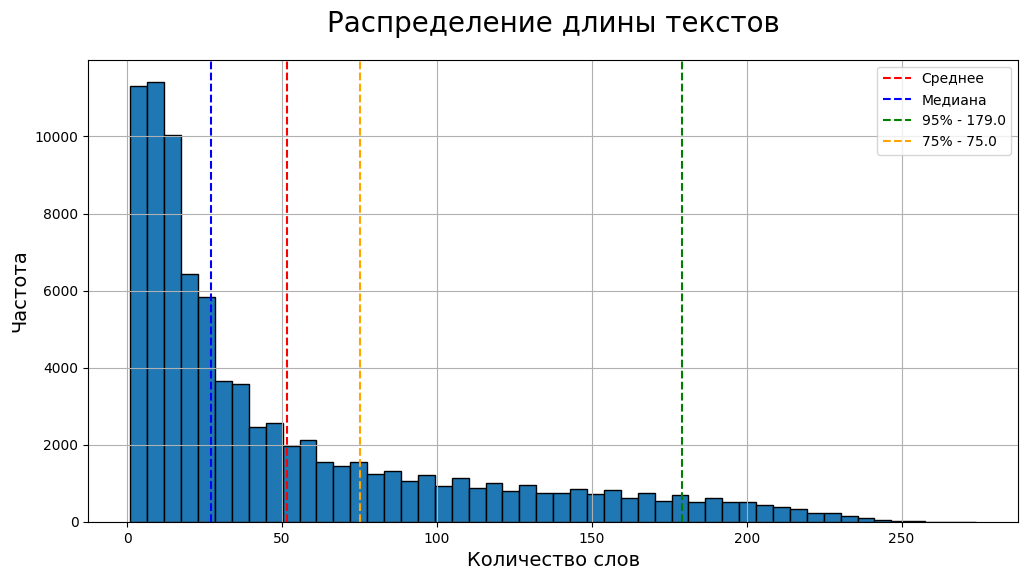

In [39]:
plt.figure(figsize=(12,6))
text_lens.hist(bins=50, edgecolor='black')

# Линии статистики
plt.axvline(text_lens.mean(), color='red', linestyle='--', label='Среднее')
plt.axvline(text_lens.median(), color='blue', linestyle='--', label='Медиана')
plt.axvline(text_lens.quantile(0.95), color='green', linestyle='--', label=f'95% - {text_lens.quantile(0.95)}')
plt.axvline(text_lens.quantile(0.75), color='orange', linestyle='--', label=f'75% - {text_lens.quantile(0.75)}')

plt.title('Распределение длины текстов', fontsize=20, pad=20)
plt.xlabel('Количество слов', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend()
plt.show()

In [40]:
# Считаем все слова в тексте и записываем в отдельную колонку
all_text_lens = df_clean['clear_text'].str.split().str.len()
df_clean['str_len'] = all_text_lens
df_clean

C:\Users\1\AppData\Local\Temp\ipykernel_16252\2740262127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['str_len'] = all_text_lens


,text,label,clear_text,str_len
0,"Пальто красивое, но пришло с дырой в молнии. П...",0,пальто красивое но пришло с дырой в молнии про...,51
1,"Очень долго шел заказ,ждала к новому году,приш...",0,очень долго шел заказ ждала к новому году приш...,14
2,"Могу сказать одно, брюки нормальные, НО они бы...",0,могу сказать одно брюки нормальные но они были...,48
3,"Доставка быстрая, меньше месяца. Заказывали ра...",0,доставка быстрая меньше месяца заказывали разм...,19
4,Мне не очень понравилось это платье. Размер ...,0,мне не очень понравилось это платье размер l п...,18
...,...,...,...,...
290453,Как всегда вкусный и свежий.,1,как всегда вкусный и свежий,5
290454,Обалденный!,1,обалденный,1
290455,"Достоинства:\nВкусно, лучшая паста\n\nНедостат...",1,достоинства вкусно лучшая паста недостатки дор...,11
290456,"Достоинства:\nУвлажняет очень хорошо, и кожа к...",1,достоинства увлажняет очень хорошо и кожа как ...,29


In [41]:
import numpy as np

# Отбираем длины до 75 %
cutoff = df_clean['str_len'].quantile(0.75)
df_clean_x = df_clean[df_clean['str_len'] <= cutoff].copy()

Осталось: 217942 / 290081


In [42]:
df_2 = df_clean_x[['clear_text', 'label']]
df_small_x, _ = train_test_split(df_2, train_size=0.4, stratify=df_2['label'], random_state=42)

In [43]:
df_small_x

,clear_text,label
46513,на рост 163 очень короткая а так на параметры ...,1
124090,вот вроде бы с одной стороны неплохой миленьки...,2
235647,товар не пришел деньги не вернули [ellipsis] я...,2
5257,к толстовке не имеет никакого отношения да и к...,0
161266,все очень понравилось отличный салон мастера и,1
...,...,...
17327,пришел свитер быстро 26 октября оплатила 23 но...,0
61948,совершенно не обработаны швы [expression] то е...,2
127248,не вежливые хотят закончить работу раньше ниче...,0
14467,на 42 размер очень велико качество так себе вр...,0


In [44]:
df_small_x['label'].value_counts()

label
1    30628
0    28928
2    27620
Name: count, dtype: int64

In [45]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

def lemma_text(text):
    words = text.split()
    lemmas = []
    for word in words:
        parsed = morph.parse(word)[0]
        lemmas.append(parsed.normal_form)
    return ' '.join(lemmas)

In [46]:
df_small_x['text_lem'] = df_small_x['clear_text'].apply(lemma_text)
df_small_x

,clear_text,label,text_lem
46513,на рост 163 очень короткая а так на параметры ...,1,на рост 163 очень короткий а так на параметр 6...
124090,вот вроде бы с одной стороны неплохой миленьки...,2,вот вроде бы с один сторона неплохой миленький...
235647,товар не пришел деньги не вернули [ellipsis] я...,2,товар не прийти деньга не вернуть [ellipsis] я...
5257,к толстовке не имеет никакого отношения да и к...,0,к толстовка не иметь никакой отношение да и ка...
161266,все очень понравилось отличный салон мастера и,1,всё очень понравиться отличный салон мастер и
...,...,...,...
17327,пришел свитер быстро 26 октября оплатила 23 но...,0,прийти свитер быстро 26 октябрь оплатить 23 но...
61948,совершенно не обработаны швы [expression] то е...,2,совершенно не обработать шов [expression] то е...
127248,не вежливые хотят закончить работу раньше ниче...,0,не вежливый хотеть закончить работа ранний нич...
14467,на 42 размер очень велико качество так себе вр...,0,на 42 размер очень большой качество так себя в...


### Преобразование текста

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [123]:
# Создание токенизатора, <UNK> для редких, словарь 30000
tokenizer = Tokenizer(num_words=30000, oov_token='<UNK>')
# Обучение на всех примерах
tokenizer.fit_on_texts(df_small['clear_text'].values)
# Преобразование в последовательность индексов
X = tokenizer.texts_to_sequences(df_small['clear_text'].values)
# Обрезка или дополнение
X = pad_sequences(X, maxlen=75, padding='post', truncating='post')
# Метки классов
y = df_small['label'].values
X.shape

(87024, 75)

In [124]:
# Для датасета с короткими
tokenizer_sh = Tokenizer(num_words=30000, oov_token='<UNK>')
tokenizer_sh.fit_on_texts(df_small_x['clear_text'].values)
X_sh = tokenizer.texts_to_sequences(df_small_x['clear_text'].values)
X_sh = pad_sequences(X_sh, maxlen=75, padding='post', truncating='post')
y_sh = df_small_x['label'].values
X_sh.shape

(87176, 75)

In [51]:
# Для данных с лемматизацией
tokenizer_lem = Tokenizer(num_words=30000, oov_token='<UNK>')
tokenizer_lem.fit_on_texts(df_small_x['text_lem'].values)
X_lem = tokenizer_lem.texts_to_sequences(df_small_x['text_lem'].values)
X_lem = pad_sequences(X_lem, maxlen=75, padding='post', truncating='post')
y_lem = df_small_x['label'].values
X_lem.shape

(87176, 75)

### Обучение модели

In [52]:
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import time

In [49]:
# Разделение на выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)

In [131]:
# Для датасета с короткими
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(
    X_sh, y_sh, test_size=0.3, random_state=42, stratify=y_sh
)
X_test_sh, X_val_sh, y_test_sh, y_val_sh = train_test_split(
    X_test_sh, y_test_sh, test_size=0.5, random_state=42, stratify=y_test_sh
)
X_train_sh.shape

(61023, 75)

In [53]:
# Для данных с лемматизацией
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(
    X_lem, y_lem, test_size=0.3, random_state=42, stratify=y_lem
)
X_test_lem, X_val_lem, y_test_lem, y_val_lem = train_test_split(
    X_test_lem, y_test_lem, test_size=0.5, random_state=42, stratify=y_test_lem
)
X_train_lem.shape

(61023, 75)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=2)

In [151]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30001, output_dim=32, input_length=75, mask_zero=True),
    tf.keras.layers.LSTM(32, dropout=0.4, recurrent_dropout=0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
start = time.time()
history1 = model1.fit(
    X_train_sh, y_train_sh,
    validation_data=(X_val_sh, y_val_sh),
    epochs=10,
    batch_size=64,
    callbacks=callback,
    verbose=1
)
end = time.time()
time_learn = end - start
print(f'Время обучения: {time_learn}')

Epoch 1/10
954/954 [==============================] - 63s 62ms/step - loss: 0.7449 - accuracy: 0.6508 - val_loss: 0.6536 - val_accuracy: 0.7070
Epoch 2/10
954/954 [==============================] - 58s 61ms/step - loss: 0.5921 - accuracy: 0.7445 - val_loss: 0.6558 - val_accuracy: 0.7021
Epoch 3/10
954/954 [==============================] - 62s 65ms/step - loss: 0.5253 - accuracy: 0.7808 - val_loss: 0.6831 - val_accuracy: 0.7032
Время обучения: 182.85630536079407


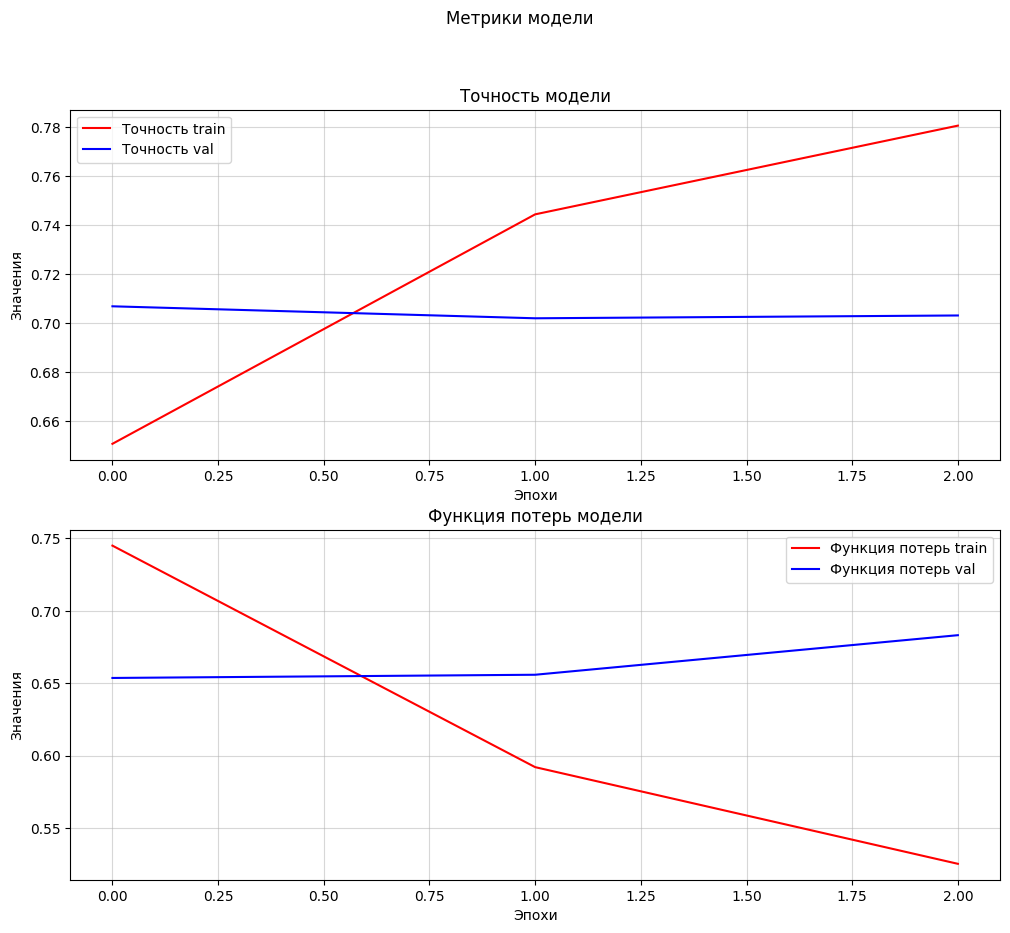

In [153]:
plt.figure(figsize=(12,10))
# Общий заголовок
plt.suptitle(f'Метрики модели')
    
plt.subplot(2,1,1) # расположение: 2 строки, 1 столбец, 1 ячейка
# Вывод линейных графиков для метрик
plt.plot(history1.history['accuracy'], color='red', label='Точность train')
plt.plot(history1.history['val_accuracy'], color='blue', label='Точность val')
# Заголовок конкретного графика
plt.title(f'Точность модели')
# Подписи осей
plt.xlabel('Эпохи')
plt.ylabel('Значения')
# Сетка (полупрозрачная)
plt.grid(alpha=0.5)
# Легенда 
plt.legend()

# Аналогично для других метрик
plt.subplot(2,1,2)
plt.plot(history1.history['loss'], color='red', label='Функция потерь train')
plt.plot(history1.history['val_loss'], color='blue', label='Функция потерь val')
plt.title(f'Функция потерь модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.show()

### Улучшение модели

In [179]:
# с лемматизацией
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30001, output_dim=32, input_length=75, mask_zero=True),
    tf.keras.layers.LSTM(32, dropout=0.5, recurrent_dropout=0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [180]:
start = time.time()
history3 = model3.fit(
    X_train_lem, y_train_lem,
    validation_data=(X_val_lem, y_val_lem),
    epochs=10,
    batch_size=64,
    callbacks=callback,
    verbose=1
)
end = time.time()
time_learn = end - start
print(f'Время обучения: {time_learn}')

Epoch 1/10
954/954 [==============================] - 66s 64ms/step - loss: 0.7526 - accuracy: 0.6536 - val_loss: 0.6670 - val_accuracy: 0.7016
Epoch 2/10
954/954 [==============================] - 64s 68ms/step - loss: 0.6441 - accuracy: 0.7130 - val_loss: 0.6472 - val_accuracy: 0.7064
Epoch 3/10
954/954 [==============================] - 59s 62ms/step - loss: 0.6084 - accuracy: 0.7324 - val_loss: 0.6473 - val_accuracy: 0.7087
Epoch 4/10
954/954 [==============================] - 60s 62ms/step - loss: 0.5868 - accuracy: 0.7419 - val_loss: 0.6470 - val_accuracy: 0.7099
Epoch 5/10
954/954 [==============================] - 62s 65ms/step - loss: 0.5685 - accuracy: 0.7531 - val_loss: 0.6515 - val_accuracy: 0.7093
Epoch 6/10
954/954 [==============================] - 63s 66ms/step - loss: 0.5528 - accuracy: 0.7598 - val_loss: 0.6611 - val_accuracy: 0.7081
Время обучения: 374.10645937919617


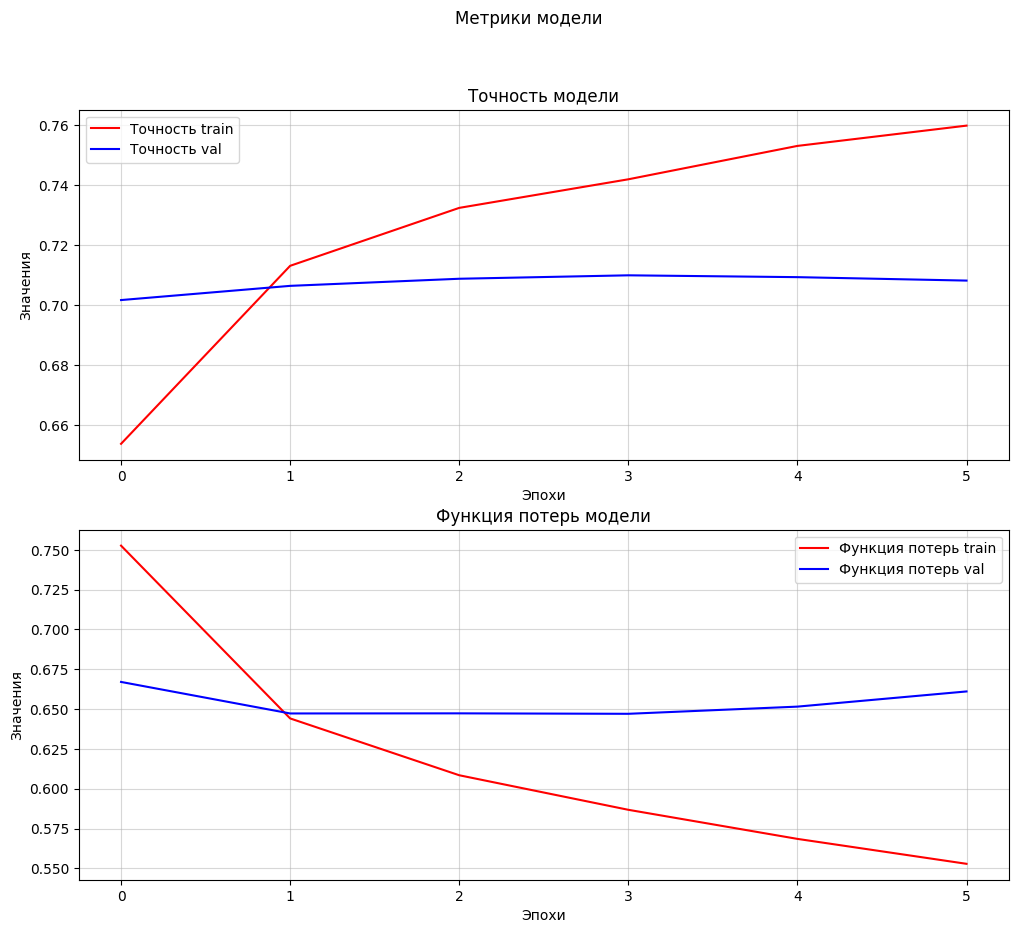

In [181]:
plt.figure(figsize=(12,10))
# Общий заголовок
plt.suptitle(f'Метрики модели')
    
plt.subplot(2,1,1) # расположение: 2 строки, 1 столбец, 1 ячейка
# Вывод линейных графиков для метрик
plt.plot(history3.history['accuracy'], color='red', label='Точность train')
plt.plot(history3.history['val_accuracy'], color='blue', label='Точность val')
# Заголовок конкретного графика
plt.title(f'Точность модели')
# Подписи осей
plt.xlabel('Эпохи')
plt.ylabel('Значения')
# Сетка (полупрозрачная)
plt.grid(alpha=0.5)
# Легенда 
plt.legend()

# Аналогично для других метрик
plt.subplot(2,1,2)
plt.plot(history3.history['loss'], color='red', label='Функция потерь train')
plt.plot(history3.history['val_loss'], color='blue', label='Функция потерь val')
plt.title(f'Функция потерь модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.show()

In [198]:
# с лемматизацией + biLSTM, бэтч 128
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30001, output_dim=128, input_length=75, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.4, recurrent_dropout=0.3)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [199]:
start = time.time()
history4 = model4.fit(
    X_train_lem, y_train_lem,
    validation_data=(X_val_lem, y_val_lem),
    epochs=10,
    batch_size=128,
    callbacks=callback,
    verbose=1
)
end = time.time()
time_learn = end - start
print(f'Время обучения: {time_learn}')

Epoch 1/10
477/477 [==============================] - 150s 298ms/step - loss: 0.7362 - accuracy: 0.6632 - val_loss: 0.6417 - val_accuracy: 0.7095
Epoch 2/10
477/477 [==============================] - 136s 284ms/step - loss: 0.6118 - accuracy: 0.7324 - val_loss: 0.6321 - val_accuracy: 0.7162
Epoch 3/10
477/477 [==============================] - 134s 282ms/step - loss: 0.5639 - accuracy: 0.7553 - val_loss: 0.6402 - val_accuracy: 0.7138
Epoch 4/10
477/477 [==============================] - 137s 287ms/step - loss: 0.5225 - accuracy: 0.7752 - val_loss: 0.6629 - val_accuracy: 0.7133
Время обучения: 556.9191210269928


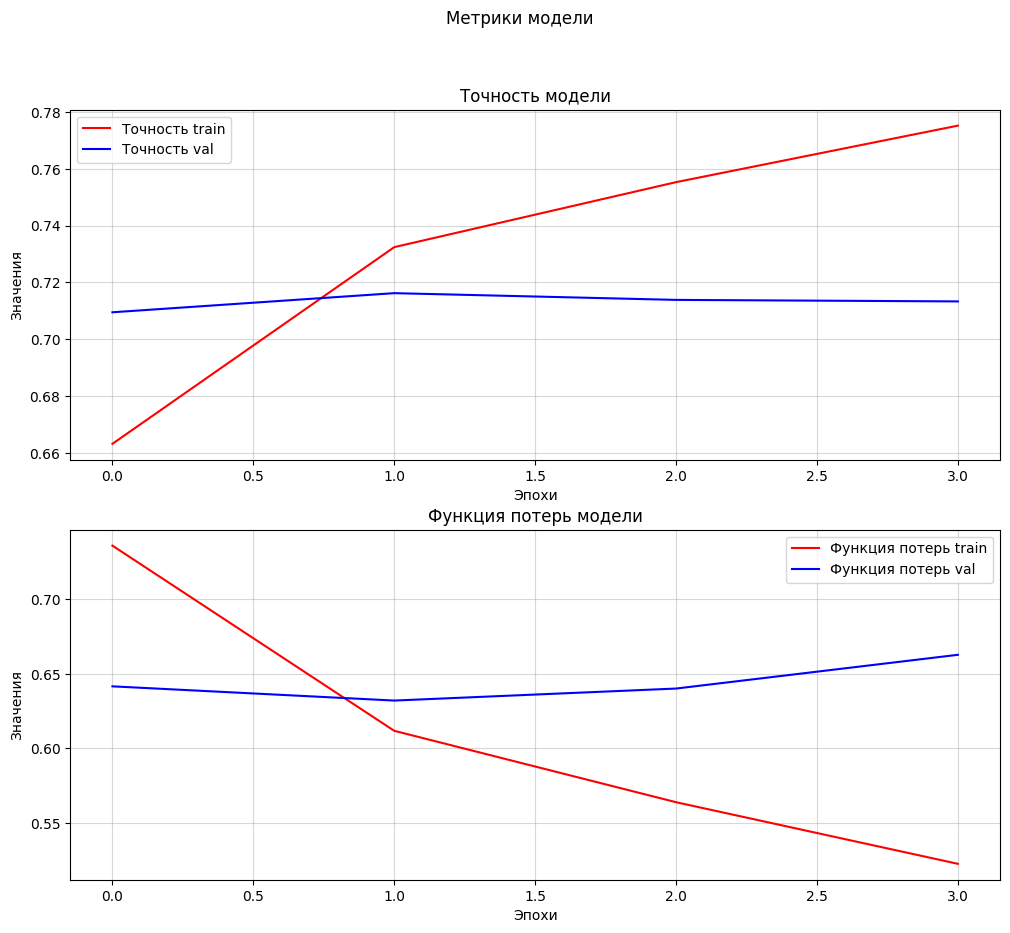

In [200]:
plt.figure(figsize=(12,10))
# Общий заголовок
plt.suptitle(f'Метрики модели')
    
plt.subplot(2,1,1) # расположение: 2 строки, 1 столбец, 1 ячейка
# Вывод линейных графиков для метрик
plt.plot(history4.history['accuracy'], color='red', label='Точность train')
plt.plot(history4.history['val_accuracy'], color='blue', label='Точность val')
# Заголовок конкретного графика
plt.title(f'Точность модели')
# Подписи осей
plt.xlabel('Эпохи')
plt.ylabel('Значения')
# Сетка (полупрозрачная)
plt.grid(alpha=0.5)
# Легенда 
plt.legend()

# Аналогично для других метрик
plt.subplot(2,1,2)
plt.plot(history4.history['loss'], color='red', label='Функция потерь train')
plt.plot(history4.history['val_loss'], color='blue', label='Функция потерь val')
plt.title(f'Функция потерь модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.show()

In [60]:
from tensorflow.keras import regularizers

model5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30001, output_dim=128, input_length=75, mask_zero=True,
                             embeddings_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.5, recurrent_dropout=0.4,
                                                      kernel_regularizer=regularizers.l2(0.0001))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [223]:
start = time.time()
history5 = model5.fit(
    X_train_lem, y_train_lem,
    validation_data=(X_val_lem, y_val_lem),
    epochs=5,
    batch_size=64,
    callbacks=callback,
    verbose=1
)
end = time.time()
time_learn = end - start
print(f'Время обучения: {time_learn}')

Epoch 1/5
954/954 [==============================] - 177s 178ms/step - loss: 0.7829 - accuracy: 0.6652 - val_loss: 0.7054 - val_accuracy: 0.7067
Epoch 2/5
954/954 [==============================] - 169s 177ms/step - loss: 0.7093 - accuracy: 0.7144 - val_loss: 0.7066 - val_accuracy: 0.7097
Epoch 3/5
954/954 [==============================] - 170s 179ms/step - loss: 0.7012 - accuracy: 0.7220 - val_loss: 0.7081 - val_accuracy: 0.7150
Epoch 4/5
954/954 [==============================] - 181s 190ms/step - loss: 0.6964 - accuracy: 0.7286 - val_loss: 0.7088 - val_accuracy: 0.7114
Epoch 5/5
954/954 [==============================] - 177s 185ms/step - loss: 0.6905 - accuracy: 0.7322 - val_loss: 0.7076 - val_accuracy: 0.7173
Время обучения: 874.7008128166199


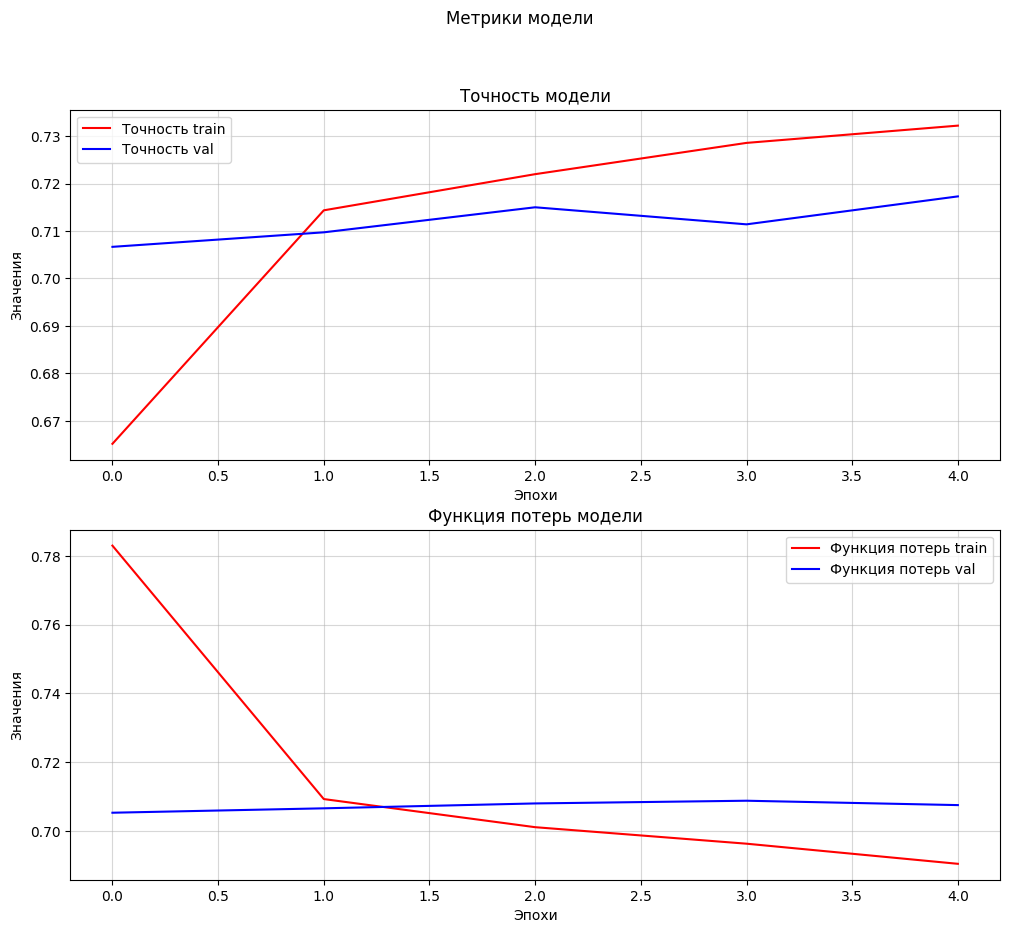

In [224]:
plt.figure(figsize=(12,10))
# Общий заголовок
plt.suptitle(f'Метрики модели')
    
plt.subplot(2,1,1) # расположение: 2 строки, 1 столбец, 1 ячейка
# Вывод линейных графиков для метрик
plt.plot(history5.history['accuracy'], color='red', label='Точность train')
plt.plot(history5.history['val_accuracy'], color='blue', label='Точность val')
# Заголовок конкретного графика
plt.title(f'Точность модели')
# Подписи осей
plt.xlabel('Эпохи')
plt.ylabel('Значения')
# Сетка (полупрозрачная)
plt.grid(alpha=0.5)
# Легенда 
plt.legend()

# Аналогично для других метрик
plt.subplot(2,1,2)
plt.plot(history5.history['loss'], color='red', label='Функция потерь train')
plt.plot(history5.history['val_loss'], color='blue', label='Функция потерь val')
plt.title(f'Функция потерь модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.show()

In [61]:
# Обучение на тестовых 
start = time.time()
history5a = model5.fit(
    X_train_lem, y_train_lem,
    validation_data=(X_test_lem, y_test_lem),
    epochs=5,
    batch_size=64,
    callbacks=callback,
    verbose=1
)
end = time.time()
time_learn = end - start
print(f'Время обучения: {time_learn}')

Epoch 1/5
954/954 [==============================] - 168s 168ms/step - loss: 0.7877 - accuracy: 0.6712 - val_loss: 0.7125 - val_accuracy: 0.7157
Epoch 2/5
954/954 [==============================] - 165s 172ms/step - loss: 0.7167 - accuracy: 0.7245 - val_loss: 0.7225 - val_accuracy: 0.7176
Epoch 3/5
954/954 [==============================] - 162s 169ms/step - loss: 0.7082 - accuracy: 0.7368 - val_loss: 0.7307 - val_accuracy: 0.7164
Epoch 4/5
954/954 [==============================] - 167s 175ms/step - loss: 0.7039 - accuracy: 0.7405 - val_loss: 0.7351 - val_accuracy: 0.7197
Epoch 5/5
954/954 [==============================] - 159s 167ms/step - loss: 0.6973 - accuracy: 0.7460 - val_loss: 0.7338 - val_accuracy: 0.7241
Время обучения: 820.9673383235931


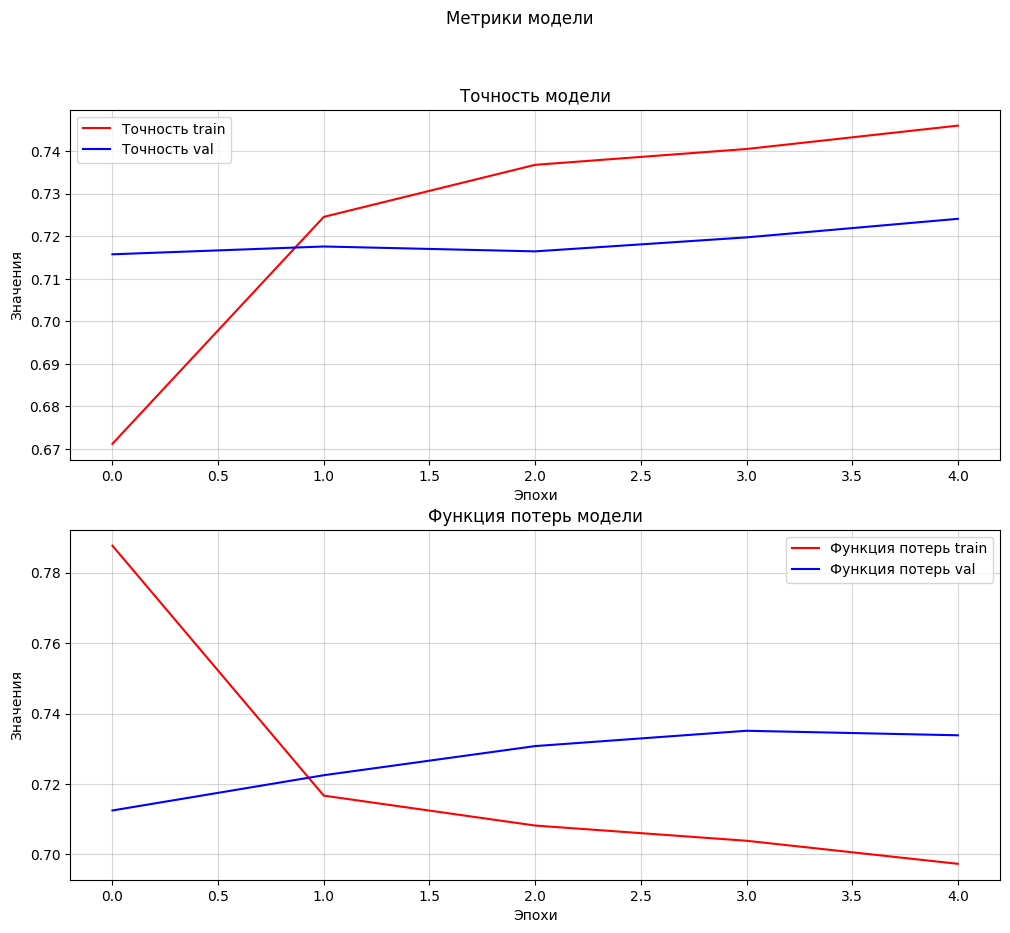

In [62]:
plt.figure(figsize=(12,10))
# Общий заголовок
plt.suptitle(f'Метрики модели')
    
plt.subplot(2,1,1) # расположение: 2 строки, 1 столбец, 1 ячейка
# Вывод линейных графиков для метрик
plt.plot(history5a.history['accuracy'], color='red', label='Точность train')
plt.plot(history5a.history['val_accuracy'], color='blue', label='Точность val')
# Заголовок конкретного графика
plt.title(f'Точность модели')
# Подписи осей
plt.xlabel('Эпохи')
plt.ylabel('Значения')
# Сетка (полупрозрачная)
plt.grid(alpha=0.5)
# Легенда 
plt.legend()

# Аналогично для других метрик
plt.subplot(2,1,2)
plt.plot(history5a.history['loss'], color='red', label='Функция потерь train')
plt.plot(history5a.history['val_loss'], color='blue', label='Функция потерь val')
plt.title(f'Функция потерь модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.show()